In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset, info = tfds.load('cats_vs_dogs', split='train', with_info=True, as_supervised=True)


Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]WARNING:absl:1738 images were corrupted and were skipped


Dataset cats_vs_dogs downloaded and prepared to /home/konstantin/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [6]:
image, label = next(iter(dataset))

2023-07-08 21:10:18.830962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [8]
	 [[{{node Placeholder/_2}}]]
2023-07-08 21:10:18.832265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [8]
	 [[{{node Placeholder/_4}}]]


In [7]:
def augment(image):
    flipped_image = tf.image.flip_left_right(image)

    saturated_image = tf.image.random_saturation(image, lower=0.5, upper=1.5)

    grayscale_image = tf.image.rgb_to_grayscale(image)

    rotated_image = tf.image.rot90(image)

    cropped_image = tf.image.random_crop(image, size=[100, 100, 3])

    brightness_image = tf.image.random_brightness(image, max_delta=0.2)

    return flipped_image, saturated_image, grayscale_image, rotated_image, cropped_image, brightness_image


In [8]:
flipped_image, saturated_image, grayscale_image, rotated_image, cropped_image, brightness_image = augment(image)

In [9]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

(-0.5, 349.5, 261.5, -0.5)

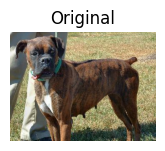

In [10]:
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

(-0.5, 349.5, 261.5, -0.5)

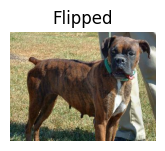

In [11]:
plt.subplot(2, 3, 2)
plt.imshow(flipped_image)
plt.title("Flipped")
plt.axis('off')

(-0.5, 349.5, 261.5, -0.5)

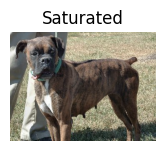

In [12]:
plt.subplot(2, 3, 3)
plt.imshow(saturated_image)
plt.title("Saturated")
plt.axis('off')

(-0.5, 349.5, 261.5, -0.5)

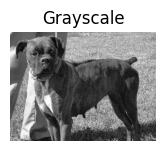

In [13]:
plt.subplot(2, 3, 4)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

(-0.5, 261.5, 349.5, -0.5)

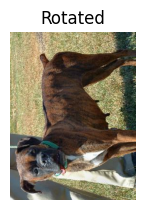

In [14]:
plt.subplot(2, 3, 5)
plt.imshow(rotated_image)
plt.title("Rotated")
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

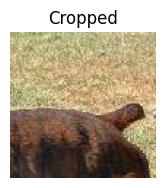

In [15]:
plt.subplot(2, 3, 6)
plt.imshow(cropped_image)
plt.title("Cropped")
plt.axis('off')

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>